# Additional EDA Analysis for PolicyAnalyzAI

In [38]:
# Import necessary libraries
import os
import json
import pandas as pd
import numpy as np
import textstat
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import norm
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

# Ensure output directory exists
output_dir = '../output'
os.makedirs(output_dir, exist_ok=True)

## Load Dataset

In [39]:
# Load the consolidated JSON dataset
data_path = '../data/processed/consolidated_data.json'
with open(data_path, 'r', encoding='utf-8') as file:
    consolidated_data = json.load(file)

# Convert to a DataFrame
df = pd.DataFrame(consolidated_data)
df['word_count'] = df['cleaned_content'].apply(lambda x: len(x.split()))
print(df.head())

# Save to CSV
df.to_csv(f'{output_dir}/consolidated_policy_data.csv', index=False)
print('✅ Dataset saved as consolidated_policy_data.csv')

                                               title  \
0  Textbooks, Studying at Otago | University of O...   
1  Policy Drafting, Review and Approval Guideline...   
2         Plans and Strategies | University of Otago   
3  International Healthcare and Insurance, Suppor...   
4         Postgraduate studies | University of Otago   

                                                 url  \
0            https://www.otago.ac.nz/study/textbooks   
1  https://www.otago.ac.nz/staff/policies/policy-...   
2  https://www.otago.ac.nz/staff/policies/plans-s...   
3   https://www.otago.ac.nz/international/healthcare   
4         https://www.otago.ac.nz/postgraduate-study   

                                     cleaned_content  \
0  Textbooks, Studying at Otago | University of O...   
1  Policy Drafting, Review and Approval Guideline...   
2  Plans and Strategies | University of Otago Red...   
3  International Healthcare and Insurance, Suppor...   
4  Postgraduate studies | University of Otago 

## Handle Missing Values

In [40]:
# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

# Save missing values to a CSV file
missing_values.to_csv(f'{output_dir}/missing_values.csv', index=True)
print('✅ Missing values report saved as missing_values.csv')

# Impute missing values for numerical columns
imputer = SimpleImputer(strategy='mean')
df['word_count'] = imputer.fit_transform(df[['word_count']])
df['content_length'] = df['cleaned_content'].apply(len)

# Save the updated DataFrame
df.to_csv(f'{output_dir}/imputed_policy_data.csv', index=False)
print('✅ Imputed dataset saved as imputed_policy_data.csv')

Missing values in each column:
title              0
url                0
cleaned_content    0
word_tokens        0
sentence_tokens    0
word_count         0
dtype: int64
✅ Missing values report saved as missing_values.csv
✅ Imputed dataset saved as imputed_policy_data.csv


## Normal Distribution Fit

✅ Word count distribution statistics saved as word_count_distribution_stats.csv


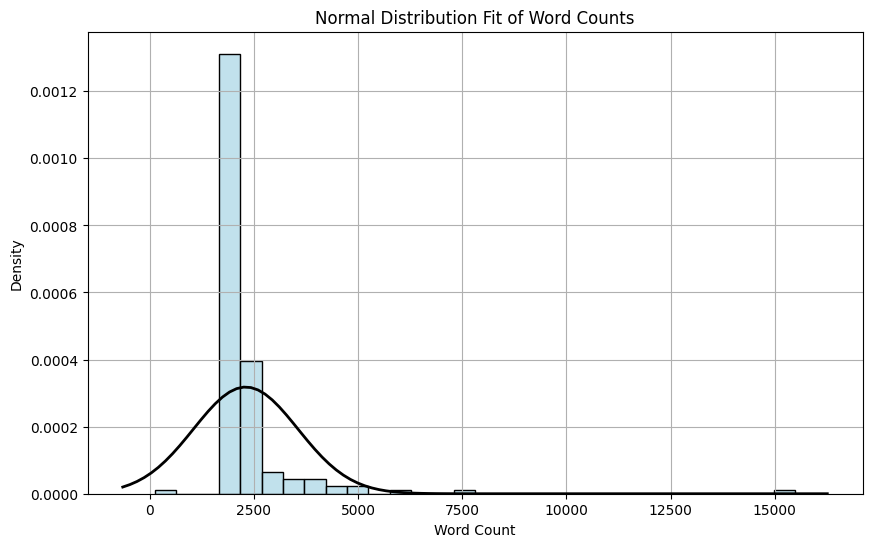

In [41]:
# Fit a normal distribution to the word count data
mean, std_dev = norm.fit(df['word_count'])

# Save distribution statistics
distribution_stats = pd.DataFrame({'Mean': [mean], 'Standard Deviation': [std_dev]})
distribution_stats.to_csv(f'{output_dir}/word_count_distribution_stats.csv', index=False)
print('✅ Word count distribution statistics saved as word_count_distribution_stats.csv')

# Plot the histogram and the fitted normal distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], kde=False, bins=30, color='lightblue', stat="density")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)
title = f'Fit Results: Mean = {mean:.2f}, Std Dev = {std_dev:.2f}'
plt.title('Normal Distribution Fit of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.grid(True)
plt.savefig(f'{output_dir}/normal_distribution_fit.png')
plt.show()

## Readability Score Analysis

✅ Readability scores saved as readability_scores.csv


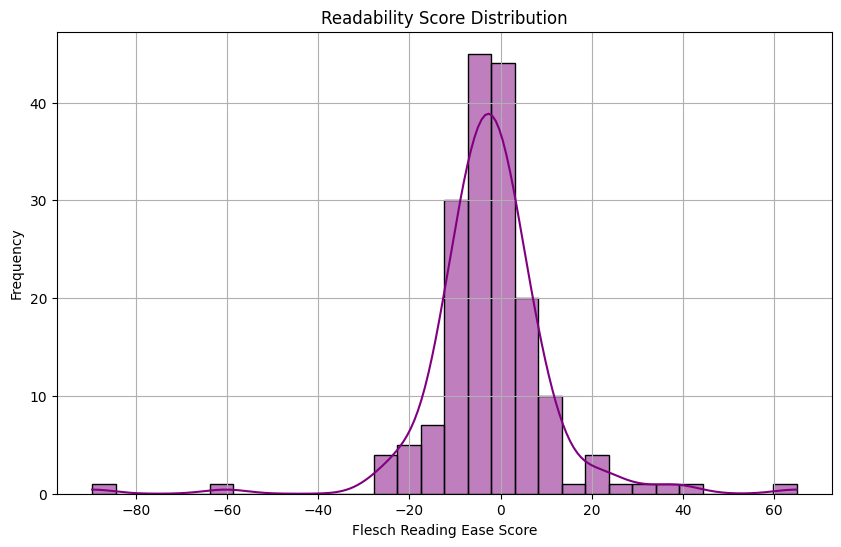

In [42]:
# Calculate readability scores using textstat
df['readability_score'] = df['cleaned_content'].apply(textstat.flesch_reading_ease)

# Save readability scores to a CSV file
df[['title', 'readability_score']].to_csv(f'{output_dir}/readability_scores.csv', index=False)
print('✅ Readability scores saved as readability_scores.csv')

# Plot readability score distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['readability_score'], bins=30, color='purple', kde=True)
plt.title('Readability Score Distribution')
plt.xlabel('Flesch Reading Ease Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig(f'{output_dir}/readability_score_distribution.png')
plt.show()

## Sentiment Analysis

✅ Sentiment analysis results saved as sentiment_analysis.csv


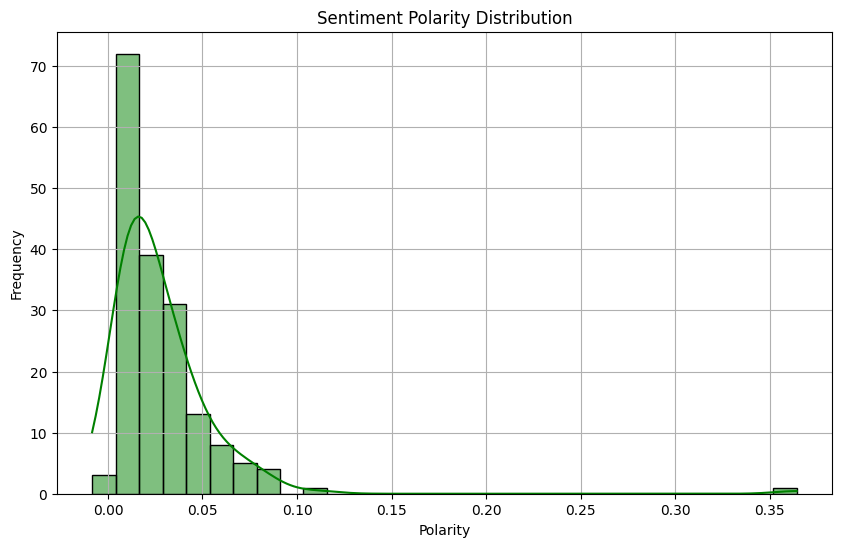

In [43]:
# Calculate sentiment polarity and subjectivity
df['polarity'] = df['cleaned_content'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['cleaned_content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Save sentiment analysis results
df[['title', 'polarity', 'subjectivity']].to_csv(f'{output_dir}/sentiment_analysis.csv', index=False)
print('✅ Sentiment analysis results saved as sentiment_analysis.csv')

# Plot sentiment polarity
plt.figure(figsize=(10, 6))
sns.histplot(df['polarity'], kde=True, bins=30, color='green')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig(f'{output_dir}/sentiment_polarity_distribution.png')
plt.show()